# Pitwall : Formula 1 Database scraper and analysis 
### Name: Mani Botla

### Date: 08/03/25

This notebook scrpaes Formula 1 data from five different pages on https://pitwall.app/ , including: 

- Race records from 1950 to 2025

- Driver statistics for the 2025 season

- Recent race data from the Belgian Grand Prix 2025

- Team statistics from 2024

- Season summaries spanning 1950 to 2025

The data is aggregated, cleaned and exported to seperate csv files{named: `drivers_2025.csv`, `teams.csv`, `belgian_gp.csv`, `seasons.csv` and `records.csv`} for analysis and visualization. 



## Import Libraries : 
- **selenium** : selenium is used for browser automation and scraping web content.
- **pandas** : pandas for data handling and export data to csv files.
- **time**: time itroduces pauses for loading.
- **traceback**: traceback is used to handle errors. It captures and displays error messages. This helps for easier debugging. 

(used python standard library to know how to use time function. https://docs.python.org/3/library/time.html)

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
import traceback

### URL 1: https://pitwall.app/drivers : contains drivers information for 2025 season
### Step 1:  Load Webpage (drivers webpage) and Scrape Table

Selenium is used to automate the loading of the Pitwall F1 webpage.
The script opens a browser (in hidden "headless" mode), navigates to the URL, and scrolls to the bottom to ensure all data is fully loaded. 

Once the page is ready, the script locates the HTML table that contains driver data and extracts all of its rows for further analysis.
These rows will later be parsed to pull out individual values such as driver name, team, number of races, wins, and podium finishes.

This is the foundation step for gathering accurate, structured data directly from a web page.

```python
options = Options()
driver = webdriver.Chrome(options=options)

try:
    driver.get("https://pitwall.app/drivers")
    time.sleep(3) 
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)
    #Explicit wait is used to ensure table rows are present before parsing them. 
    wait = WebDriverWait(driver, 10)
    rows = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "table tr")))
```

### Step 2- Extract Driver Stats : In this step, clean and structured data is prepared so it can be convereted into a pandas Dataframe.

This for loop, loops through the table rows on the Pitwall driver page to extract performance metrics for each driver. The first row is skipped since it contains the column headers. 

Each row is expected to contain at least five cells:
- Driver number and name
- Team name
- Number of races entered
- Wins achieved
- Number of Podium finishes

The script pulls the above values, cleans them using .strip() to remove extra whitespace.
Then, it converts numerical values to integers, and stores each driver's data in a dictionary. All dictionaries are added to a list, which will be used to build a full dataset in the next step. 
The for loop contains a try/except block. Error message will be printed if there is any issue while running the code.


```python
   driver_data = []
    for row in rows[1:]: 
        try:
            #Extract columns within the row and skips rows with missing fields.
            cols = row.find_elements(By.TAG_NAME, "td")
            if len(cols) >= 5:
                driver_number_name = cols[0].text.strip()
                team = cols[1].text.strip()
                races = int(cols[2].text.strip())
                wins = int(cols[3].text.strip())
                podiums = int(cols[4].text.strip())
                driver_data.append({
                    "Driver": driver_number_name,
                    "Team": team,
                    "Races": races,
                    "Wins": wins,
                    "Podiums": podiums
                })
        except Exception as e:
            print("Error while parsing row:")
            traceback.print_exc()
```

### Step 3- Convert to DataFrame & Export
- `pd.DataFrame(driver_data)`: Converts the list of dictionaries into tabular format.
- `df.head()`: Displays the first few rows to verify the structure and contents before exporting.
- `df.to_csv()`: Saves the data to a CSV file named (drivers_2025.csv). 



```python
    df = pd.DataFrame(driver_data)

    df.to_csv("drivers_2025.csv", index=False)
    print(" Data is exported to drivers_2025.csv")

except Exception as e:
    print("Error during scraping:")
    traceback.print_exc()
#finally runs even if the run was successful or not. driver.quit() inside finally function makes sure the browser is always closed after scraping. 
finally:
    driver.quit()
```

### Complete code in one cell to make the execution successful: drivers_2025.csv

In [2]:
#Step 1: 
options = Options()
driver = webdriver.Chrome(options=options)

try:
    driver.get("https://pitwall.app/drivers")
    time.sleep(3) 
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)
    wait = WebDriverWait(driver, 10)
    rows = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "table tr")))
#Step 2:
    driver_data = []
    for row in rows[1:]:  # Skip table header
        try:
            #Extract columns within the row and skips rows with missing fields.
            cols = row.find_elements(By.TAG_NAME, "td")
            if len(cols) >= 5:
                driver_number_name = cols[0].text.strip()          
                team = cols[1].text.strip()
                races = int(cols[2].text.strip())
                wins = int(cols[3].text.strip())
                podiums = int(cols[4].text.strip())
                #Store driver data as a dictionary.
                driver_data.append({
                    "Driver": driver_number_name,
                    "Team": team,
                    "Races": races,
                    "Wins": wins,
                    "Podiums": podiums
                })
        except Exception as e:
            print("Error while parsing row:")
            traceback.print_exc()
#Step 3:
    df = pd.DataFrame(driver_data) 
    df.to_csv("drivers_2025.csv", index=False)
    print(" Data is exported to drivers_2025.csv")

except Exception as e:
    print("Error during scraping or exporting:")
    traceback.print_exc() 
finally:
    driver.quit()

 Data is exported to drivers_2025.csv


### Results: 
#### A csv file containing F1 Drivers performance for 2025 season is created.
#### Key features: 
- Number of races
-  podiums
-  wins per driver 

## Same 3 Steps for scraping and exporting data to csv files are followed for the next three URLs.

### URL 2: https://pitwall.app/teams/archive/2024 : contains Teams information and statistics for 2024 season

In [3]:
#Step 1: 
options = Options()
options.add_argument("--headless")
driver = webdriver.Chrome(options=options)

try:
    driver.get("https://pitwall.app/teams/archive/2024")

    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "table"))
    )

    rows = driver.find_elements(By.CSS_SELECTOR, "table tr")
    #Step 2: 
    team_data = []

    for row in rows[1:]: 
        cols = row.find_elements(By.TAG_NAME, "td")
        if len(cols) >= 4:
            team = cols[0].text.strip()
            drivers = cols[1].text.strip()
            wins = cols[2].text.strip()
            podiums = cols[3].text.strip()

            team_data.append({
                "Team": team,
                "Drivers": drivers,
                "Wins": wins,
                "Podiums": podiums
            })
    #Step 3: 
    df = pd.DataFrame(team_data) 
    df.to_csv("teams_2024.csv", index=False)
    print("Exported to teams_2024.csv")
finally:
    driver.quit()

Exported to teams_2024.csv


### Results: 
#### A csv file containing team statistics for 2024 season is created.
#### Key features: 
- Team Name
- Drivers
- Wins
- Podiums


### URL3: https://pitwall.app/races/2025-belgian-grand-prix : contains race results from Belgian grand prix.

When the same steps as before are followed for this URL3, data from 1950 Belgian grand prix to 2025 Belgian grand prix results are stored in csv file. To clean up the csv file so only 2025 race results are included, an additional step is included in the code. 

## Trim and Export new Dataset

In this step, `df.head(20)` is used to select the first 20 rows of the dataFrame(as the first 20 are race results from 2025 season) and stored in a new variable called {`df_trimmed`}.
Then saved to same CSV file name belgian_gp.csv. The old dataFrame will ge gone and new dataFrame with values will be stored. 


In [4]:
#Step 1: 
options = Options()
driver = webdriver.Chrome(options=options)

try:
    driver.get("https://pitwall.app/races/2025-belgian-grand-prix")
    time.sleep(3)

    rows = driver.find_elements(By.CSS_SELECTOR, "table tr")
    #Step 2: 
    race_data = []
    for row in rows[1:]:
        cols = row.find_elements(By.TAG_NAME, "td")
        if len(cols) >= 4:
            position = cols[0].text.strip()
            driver_name = cols[1].text.strip()
            team = cols[2].text.strip()
            time_or_gap = cols[3].text.strip()
            race_data.append({
                "Position": position,
                "Driver": driver_name,
                "Team": team,
                "Time/Gap": time_or_gap
            })
#Step3:
    pd.DataFrame(race_data).to_csv("belgian_gp.csv", index=False)
    print("Exported to belgian_gp_2025.csv")
finally:
    driver.quit()

# Additional step: 
df = pd.read_csv("belgian_gp.csv")
df_trimmed = df.head(20)
df_trimmed.to_csv("belgian_gp.csv", index=False)
print("Successfully saved the new file with 20 rows")

Exported to belgian_gp_2025.csv
Successfully saved the new file with 20 rows


### Results: 
#### A csv file containing race results from 202 belgian grand prix is created.
#### Key features: 
- Position of driver by the end of the race
- Driver name
- Team name
- Time gap from race winner

### URL4: https://pitwall.app/records : contains all formula1 records so far and record holders. 

In [5]:
#Step 1: 
options = Options()
driver = webdriver.Chrome(options=options)

try:
    driver.get("https://pitwall.app/records")
    time.sleep(3)

    rows = driver.find_elements(By.CSS_SELECTOR, "table tr")
    #Step 2: 
    record_data = []
    for row in rows[1:]:
        cols = row.find_elements(By.TAG_NAME, "td")
        if len(cols) >= 3:
            category = cols[0].text.strip()
            record_holder = cols[1].text.strip()
            value = cols[2].text.strip()
            record_data.append({
                "Category": category,
                "Record Holder": record_holder,
                "Value": value
            })
#Step 3: 
    pd.DataFrame(record_data).to_csv("records.csv", index=False)
    print("Exported to records.csv")
finally:
    driver.quit()

Exported to records.csv


### Results:
#### A csv file containing all time records in formula 1 is created. 
#### Key features:
- Category ( driver with highest podiums, driver with fastest lap time, team with most wins etc.)
- Record Holder
- Value

### URL5: https://pitwall.app/seasons : statistics from each season are stored. 
This webscraping and exporting  code uses a different approach from other URLs. This is becuase if the same steps are followed from before URLs, the csv file contains to columns : season year and their respective URL for each season. It does not give detailed season statistics. 


### Import additional Libraries
- **requests** – to send HTTP requests and retrieve the page content  
- **BeautifulSoup** – to parse and extract HTML elements from the page  

In [6]:
import requests
from bs4 import BeautifulSoup

### Parse the Web Page

A `.get()` request is sent to the Pitwall seasons page and parse the HTML content using `html.parser`. This gives access to the page structure and in this way the season statistics table can be isolated.

In [7]:
url = "https://pitwall.app/seasons"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")


### Extract Seasons Data and exporting to csv file.

We locate all the table rows (`<tr>`) and skip the first one since it's the header. For each valid row with six columns, we extract:

- Season
- Champion
- Constructor Champion
- Number of Races
- Number of Drivers
- Number of Teams
List of season dictionaries are exported to season.csv file.

In [8]:
rows = soup.find_all("tr")[1:]  

season_data = []

for row in rows:
    cols = [td.get_text(strip=True) for td in row.find_all("td")]
    if len(cols) == 6:
        season_data.append({
            "Season": cols[0],
            "Champion": cols[1],
            "Constructor Champion": cols[2],
            "Races": int(cols[3]),
            "Drivers": int(cols[4]),
            "Teams": int(cols[5])
        })
df = pd.DataFrame(season_data)
df.to_csv("seasons.csv", index=False)
print("Exported to seasons.csv")

Exported to seasons.csv


### Results: 
#### A csv file containing every formula 1 season data is created.
#### Each row in the table represents a season from 1950 through 2025 and includes details such as
- world champion
- constructor champion
- the number of races, drivers, and teams involved.

## Analysis Question 1: What is the podium to driver ratio per team? 

## Podium to driver ratio per team: 

This question analyzes the efficiency of Formula 1 teams in converting driver efforts into podium finishes. Extracting the number of drivers per team and calculating the podium-to-driver ratio provides a measure of each team's success relative to the size of its driver lineup. `teams_2024.csv` need to be used for this analysis.
The dataset `teams_2024.csv` contains:
- Team name
- Drivers
- Total podiums for each team

### Step 1: Parse Driver Strings and CountDrivers

The driver srings containing `&` and `and` are replaced with `commas` to handle variablility. Next, the string is split and whitespace is removed to count number of unique drivers per team.
`def count_drivers()` : This function counts number of drivers. 
In this step, a new column name `Driver_count` is created. 

### Step 2: Calculating Podium-to-Driver Ratio

how many podiums each team earned per driver is calculated by dividing the total podiums by driver count:
in simple words- 

{Podium-to-Driver Ratio} = {{Podiums}/{Driver Count}}

This ratio reveals team-level efficiency:
- A high ratio indicates a few drivers achieving many podiums.
- A low ratio may indicate podiums are spread across more drivers or fewer podiums overall.

### Step 3: Formatted Output

 `tabulate` library presents the below columns in a double-grid format:
- `Team`
- `Driver Count`
- `Podiums`
- `Podium to Driver Ratio`


In [9]:
#Step 1:
from tabulate import tabulate 
df = pd.read_csv('teams_2024.csv')

def count_drivers(driver_string):
    normalized = driver_string.replace('&', ',').replace('and', ',')
    drivers = [d.strip() for d in normalized.split(',') if d.strip()]
    return len(drivers)

df['Driver Count'] = df['Drivers'].apply(count_drivers)
#Step 2:
df['Podium to Driver Ratio'] = (df['Podiums'] / df['Driver Count']).round(2)

result = df[['Team', 'Driver Count', 'Podiums', 'Podium to Driver Ratio']]

#Step 3:
print(tabulate(result, headers='keys', tablefmt='double_grid'))

╔════╦═════════════════════════════════╦════════════════╦═══════════╦══════════════════════════╗
║    ║ Team                            ║   Driver Count ║   Podiums ║   Podium to Driver Ratio ║
╠════╬═════════════════════════════════╬════════════════╬═══════════╬══════════════════════════╣
║  0 ║ Alpine F1 Team                  ║              3 ║         2 ║                     0.67 ║
╠════╬═════════════════════════════════╬════════════════╬═══════════╬══════════════════════════╣
║  1 ║ Aston Martin                    ║              3 ║         0 ║                     0    ║
╠════╬═════════════════════════════════╬════════════════╬═══════════╬══════════════════════════╣
║  2 ║ Scuderia Ferrari                ║              3 ║        22 ║                     7.33 ║
╠════╬═════════════════════════════════╬════════════════╬═══════════╬══════════════════════════╣
║  3 ║ Haas F1 Team                    ║              3 ║         0 ║                     0    ║
╠════╬════════════════════════

### Results: 
- Red Bull Racing team has highest ratio of 9, indicating that few drivers (in this case 2) achieving many podiums (18).
- Based on this data, teams with lowest ratio(0) : 5 teams indicate that there are few or even 0 podiums overall.

## Analysis Question 2: How has the number of races per season evolved over time?

### Season Evolution:
### Step 1: Load and Prepare the Dataset
- `seaborn` and `matplotlib.pyplot` libraries need to be imported for crafting detailed visualizations. 

- `seasons.csv` dataset is loaded and data need to be convereted to appropriate datatypes for analysis.
- `df = df[['Season', 'Races']].dropna()` : ensures that only `seasons` and `races` columns are present and removes any rows with missing values.
- `df['Season'] = df['Season'].astype(int)` : Converts the Season column to integer type.
- `df['Races'] = df['Races'].astype(int)` : Converts the Races column to integer type.

### Step 2: Building a line plot and visualizing

The Seaborn style is used for  a cleaner plot layout:

`sns.set_style("whitegrid")` : Applies a white grid background for better readability.
- dark blue line plot is built that shows how the number of races has changed across seasons.

The code where the line plot was built and labeled is commented with explanation for each important line.

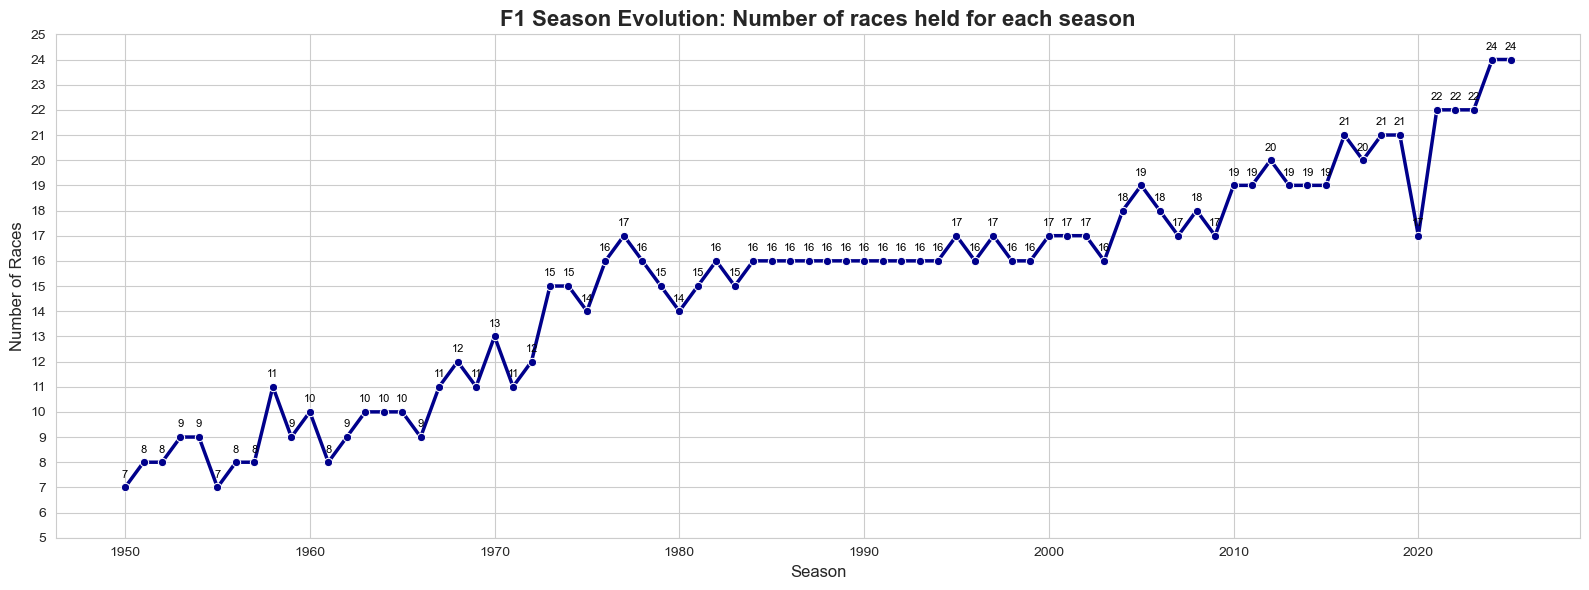

In [10]:
#Step 1:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('seasons.csv')

df = df[['Season', 'Races']].dropna()
df['Season'] = df['Season'].astype(int)
df['Races'] = df['Races'].astype(int)

#Step 2: 
sns.set_style("whitegrid")

plt.figure(figsize=(16, 6)) #Sets the figure size to make the plot wide and clear.
line = sns.lineplot(data=df, x='Season', y='Races', marker='o', linewidth=2.5, color='darkblue')

# Places labels slightly above each data point.
for x, y in zip(df['Season'], df['Races']):
    plt.text(x, y + 0.3, str(y), ha='center', va='bottom', fontsize=8, color='black')

#A descriptive title and axis labels:
plt.title('F1 Season Evolution: Number of races held for each season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12) # Label for x- axis
plt.ylabel('Number of Races', fontsize=12)# label for y- axis
plt.ylim(5, 25)
plt.yticks(range(5, 26, 1))
plt.tight_layout()
plt.show()

### Results: 

The line graph reveals an upward trend in the number of Formula 1 races per season since the championship began in 1950. While early seasons featured only a handful of races, there has been a steady and significant increase over the decades. This reflects the sport’global expansion(as the races started to be held in various countries) and commercial growth.

One noticeable dip occurs around 2019–2021, corresponding to the COVID-19 pandemic. Travel restrictions and health concerns led to reduced race calendars during that period.

The recent seasons have reached record-breaking race counts.

This visualization underscores F1’s evolving scale through global challenges.

## Analysis Question 3: Which team and driver have the highest win and podium percentage from 1950-2025 seasons?

###  Step 1: Preparing data and extracting
#### `seaborn` and `matplotlib.pyplot` libraries are imported.
In this step, `records.csv` data is cleaned and transformed. dataclean and transform the raw `records.csv` data:

- Filtering values: Only rows with `'%'` in the `Value` column are saved to focus on win/podium percentages.
- Numeric Conversion: The `%` symbol is removed from each value, and the result is converted into a float under a new column called `Percentage`.
- Categorization:
  - `Level (Driver/Team)`: Identifies whether the record relates to a driver or a team.
  - `Metric`: Extracts what kind of percentage metric is being measured (e.g., Win %, Podium %).

After this step, the dataset is ready for grouped visualization.


### Step 2: Visualization

Using `seaborn.catplot`, a faceted bar chart is built. The bar chat is split by performance level:

- x-axis: `Record Holder` — names of drivers or teams.
- y-axis: `Percentage` — numeric performance metric.
- `Metric` — distinguishes between win rate vs podium rate.
- Columns: Facets separate charts by `Driver` and `Team`.

This Label rotation and annotations improve readability.

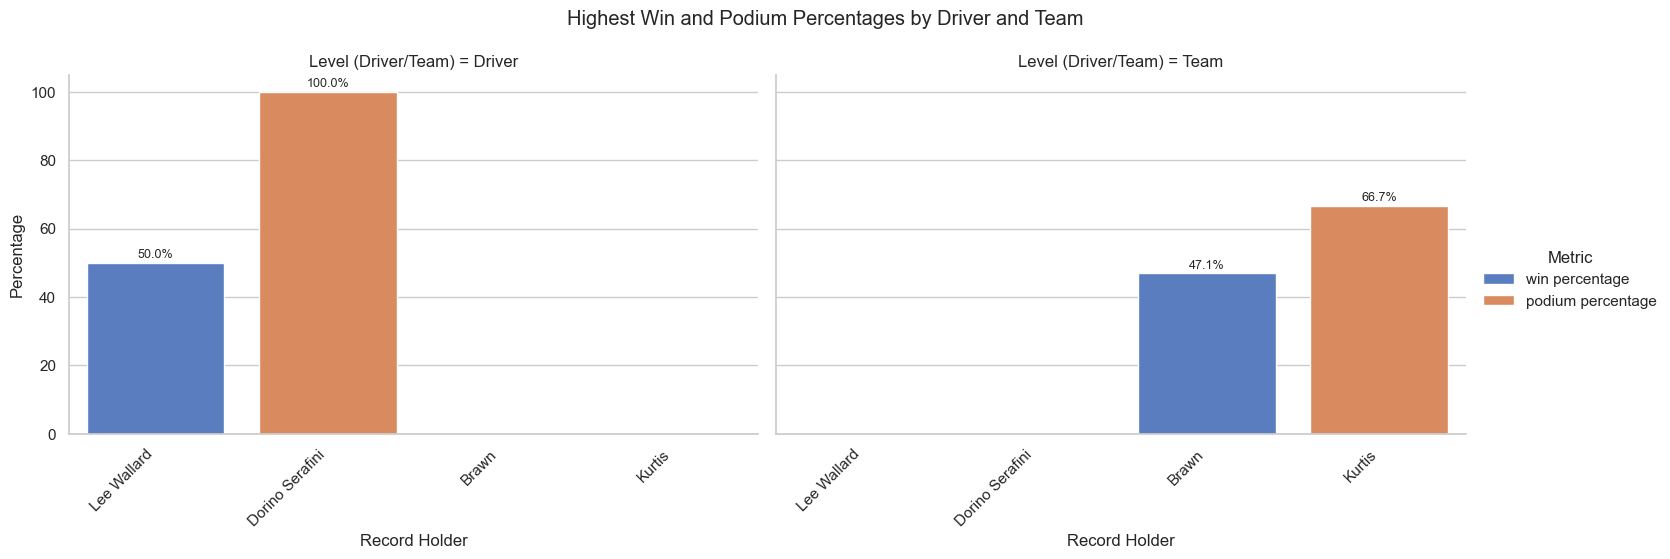

In [11]:
#Step 1: 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("records.csv")

df_percent = df[df['Value'].str.contains('%', na=False)].copy()
df_percent["Percentage"] = df_percent["Value"].str.replace('%', '').astype(float)
df_percent["Level (Driver/Team)"] = df_percent["Category"].apply(
    lambda x: "Driver" if x.lower().startswith("driver") else "Team"
)
df_percent["Metric"] = df_percent["Category"].str.replace("Driver ", "").str.replace("Team ", "")

# Step 2: 
sns.set(style="whitegrid")
g = sns.catplot(
    data=df_percent,
    kind='bar',
    x='Record Holder',
    y='Percentage',
    hue='Metric',
    col='Level (Driver/Team)',
    height=5,
    aspect=1.5,
    palette='muted'
)
# Rotate labels and add percentage text
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

    for p in ax.patches:
        height = p.get_height()
        if pd.notnull(height) and height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2.,
                height + 0.5,
                f'{height:.1f}%',
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Highest Win and Podium Percentages by Driver and Team')
plt.show()



### Results: 

- **Podium %** indicates reliability and ability to stay competitive over time. 
- **Win %** is more exclusive and highlights race-winning dominance.
- Lee Wallard holding a win rate of 50% is extraordinary. It suggests he won half the races he entered.
- Dorino Serafini’s 100% podium rate implies he made it to the top 3 in every single race he participated in. 
- With a 47.1% win rate, Brawn GP is a prime example of single-season dominance.
- Kurtis, with a 66.7% podium rate, shows strong competitiveness even if their win rate isn't as high.



## Analysis Question 4: Who are the top drivers with the highest podium efficiency (podiums per race) in the 2025 season, and how many podiums did each achieve?

#### Step 1: Load Data and Calculate Podium Rate
- `matplotlib.pyplot` is imported
- `drivers_2025.csv` is loaded and podium rate for each driver is calculated.
- Podium rate = number of podiums/number of races participated.
  
`df['PodiumToRaceRatio'] = df['Podiums'] / df['Races']`

### Step 2: Filtering and Sorting Drivers by Podium Rate
- drivers with zero podiums are removed.
- top 10 drivers with podium rate are sorted. 
`top_drivers = df_sorted.head(10).copy()`

### Step 3: Plotting Podium Rate with Color Gradient
We plot the podium rate on the y-axis with bars colored by rate intensity using a color gradient. Each bar is annotated with the driver’s total podium count for context.
- Podium rate is plotted on y-axis with bars colored by the rate intensity using a color gradient.
- Each bar is annotatedd with the driver's total podium count.


**Note** : The output will give only 7 drivers on the plot. It is becuase in the 2025 season only 8 drivers secured podiums out of 20. 

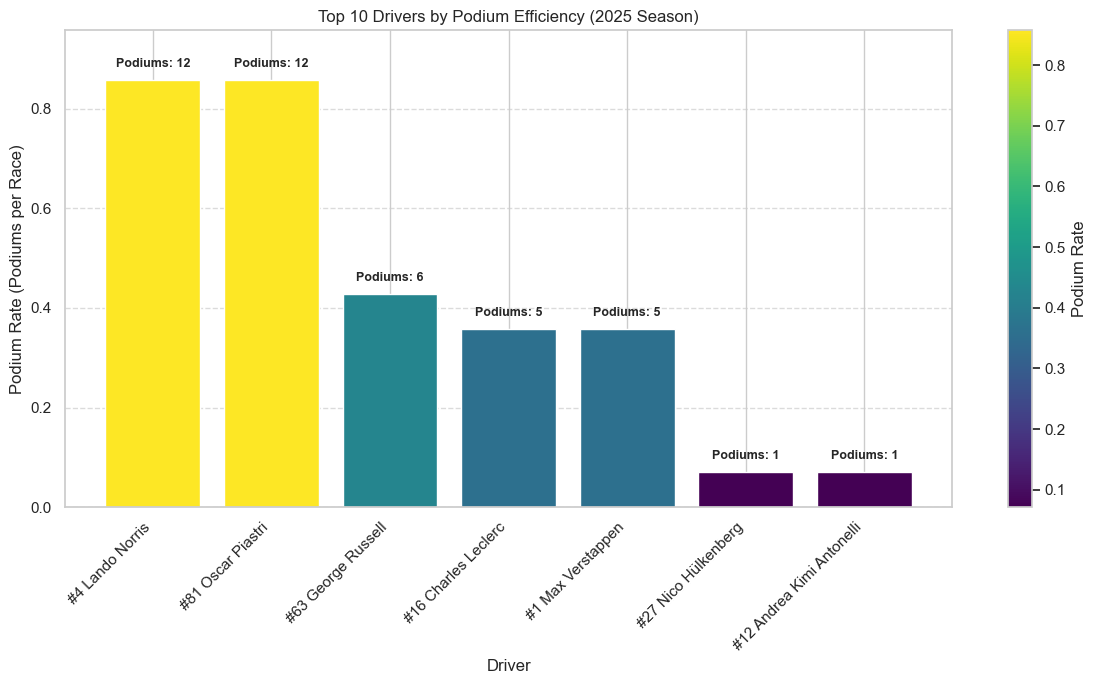

In [12]:
#Step 1: 
import matplotlib.pyplot as plt
df = pd.read_csv('drivers_2025.csv')

df['PodiumToRaceRatio'] = df['Podiums'] / df['Races']

#Step 2:
df_filtered = df[df['PodiumToRaceRatio'] > 0]
df_sorted = df_filtered.sort_values(by='PodiumToRaceRatio', ascending=False)
top_drivers = df_sorted.head(10).copy()

#Step 3:
norm = plt.Normalize(top_drivers['PodiumToRaceRatio'].min(), top_drivers['PodiumToRaceRatio'].max())
colors = plt.cm.viridis(norm(top_drivers['PodiumToRaceRatio']))
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(top_drivers['Driver'], top_drivers['PodiumToRaceRatio'], color=colors)

for bar, podiums in zip(bars, top_drivers['Podiums']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02,
            f'Podiums: {podiums}', ha='center', va='bottom', fontsize=9, fontweight='bold')
ax.set_ylabel('Podium Rate (Podiums per Race)')
ax.set_xlabel('Driver')
ax.set_title('Top 10 Drivers by Podium Efficiency (2025 Season)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, top_drivers['PodiumToRaceRatio'].max() + 0.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Podium Rate')

plt.tight_layout()
plt.show()


### Results : 
This plot highlights drivers who are most efficient at converting race participations into podium finishes.

Drivers with higher podium rates consistently finish in the top three, regardless of total races.

The top drivers are :
#4 Lando Norris and #81 Oscar Piastri

and they both achieve same number of podiums : 12.

### External Resources used: 
https://www.browserstack.com/guide/python-selenium-to-run-web-automation-test

https://docs.python.org/3/library/index.html

https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python

https://realpython.com/python-requests/